### Important paper
#### Noiseless case

#### Noisy case
[T.Tony Cai and Lie Wang (2011) Orthogonal Matching Pursuit for Sparse Signal Recovery With Noise](https://math.mit.edu/~liewang/OMP.pdf)

[Tong Zhang (2009) On the Consistency of Feature Selection
using Greedy Least Squares Regression](https://www.jmlr.org/papers/volume10/zhang09a/zhang09a.pdf)


### Important Definitions
Mutual Incoherence



### Simple Code Example (VAR)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# generate SEM
import sys
sys.path.append("..")

import helper.helper as h
import helper.methods as m

from importlib import reload  # Python 3.4+

In [49]:
reload(m)

<module 'helper.methods' from '..\\helper\\methods.py'>

True W:
[[ 0.4   0.    0.  ]
 [-0.35  0.4   0.  ]
 [ 0.63  0.    0.4 ]].

-0.0029868716976186116
0.08254397479550024


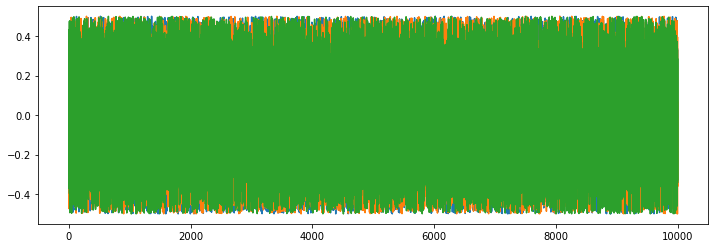

In [38]:
np.random.seed(seed = 12345)

## Number of dimensions, number of edges, number of samples
T, n, s = 10000, 3, 3

N = int(n * (n + 1) / 2)

### Coefficient matrix
## First approach: A is a DAG, no model mismatch
W_true = h.generate_A(n, s, tril = False, low = 0.30, high = 0.70)

# set coefficients to be positive (else oscillating which does not make sense)
for i in range(len(W_true)):
    W_true[i][i] = 0.4

s = len(W_true.flatten().nonzero()[0])

## Datagenerating W
print(f"True W:\n{np.round(W_true, 2)}.\n")

## Generate series
X = np.random.rand(T, n) - 0.5
Y = X @ W_true + np.random.normal(0, 1, T * n).reshape(T, n)
print(np.mean(X))
print(np.var(X))
#for i in range(n):
#     X[:, i] /= np.linalg.norm(X[:, i], 2)
    
plt.figure(figsize = (12, 4))
plt.plot(X);

In [40]:
reload(m)
W_K = m._OMP_2(X, Y, max_coefs = 5, tol = 0.2, verbose = False)
print(W_K)
W_K, r = m._K_OMP(X, Y, max_coefs = 5, tol = 100, verbose = True)
print(W_K)

Q
[103.58854183053712, 99.76124238686059, 101.10069768808955]
Q
[101.80563365819967, 99.76124238686059, 101.10069768808955]
Q
[100.89350863257818, 99.76124238686059, 101.10069768808955]
Q
[100.30894334899622, 99.76124238686059, 101.10069768808955]
Q
[100.30894334899622, 99.20211506634307, 101.10069768808955]
[[ 0.47257189  0.          0.        ]
 [-0.37643867  0.36608867  0.        ]
 [ 0.66366624  0.          0.3385419 ]]
[[394.17  25.27  12.08]
 [311.48 303.88   8.85]
 [550.24  23.04 279.9 ]]
Iteration 1.

Gains:
[[394.167  25.27   12.078]
 [311.48  303.877   8.851]
 [550.241  23.039 279.899]].

Beta_1:
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.666 0.    0.   ]].

Residual Squared: [10364.38704455  9952.30548257 10221.35107302].


[[389.29  25.27  12.08]
 [314.88 303.88   8.85]
 [  0.    23.04 279.9 ]]
Iteration 2.

Gains:
[[389.292  25.27   12.078]
 [314.884 303.877   8.851]
 [  0.     23.039 279.899]].

Beta_2:
[[0.475 0.    0.   ]
 [0.    0.    0.   ]
 [0.661 0.    0.   ]].



### Residual

In [737]:
reload(m)
from tqdm import tqdm

In [792]:
residuals = np.array([])
T = 1000000
sigma = 0.05

In [793]:
print(W_true)

[[ 0.4         0.          0.        ]
 [-0.35228292  0.4         0.        ]
 [ 0.63057445  0.          0.4       ]]


In [794]:
print(n * T * sigma ** 2)

7500.000000000002


In [795]:
get_tol(0.75, T, sigma, n)

7507.154044143068

In [808]:
total = 5000
correct = 0
quant = 0.5

for _ in tqdm(range(total)):
    X = np.random.rand(T, n) - 0.5
    Y = X @ W_true + np.random.normal(0, sigma, T * n).reshape(T, n)
    
    W_K, r = m._K_OMP(X, Y) #, tol_res = get_tol(quant, T, sigma, n), verbose = False) #get_tol(0.05, T, sigma), verbose = False)
    correct += sum(W_K.flatten() != 0) == 5
    residuals = np.append(residuals, r)

# print(correct / total)
# print(quant)

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [22:27<00:00,  3.71it/s]


### Distribution of residuals
Assuming the true model, we have that
$$||\epsilon_i||^2_2 \sim \mathcal{N}(T \sigma^2, 2 T \sigma^4)$$

In [860]:
r2 = residuals.copy()
print(np.mean(r2))
r2 -= sigma ** 2 * T * n
print(np.mean(r2), np.var(r2))
r2 /= (np.sqrt(T * sigma ** 4 * 2 * n))
print(np.mean(r2), np.var(r2))

7500.0590387629645
0.059038762962556654 37.33817338842535
0.009640989620225998 0.9956846236913426


In [810]:
scistats.norm.ppf(0.841)

0.9985762706156592

In [861]:
import scipy.stats as scistats

def get_tol(quant, T, sigma, n):
    return (scistats.norm.ppf(quant) * np.sqrt(2 * T * sigma ** 4 * n) + T * sigma ** 2 * n)

In [811]:
print(np.shape(residuals))

(5370,)


In [812]:
import scipy.stats as scistat
scistat.normaltest(residuals.flatten())

NormaltestResult(statistic=0.5418684864302192, pvalue=0.7626666452627691)

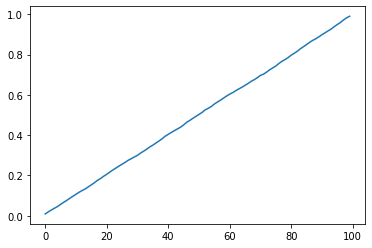

In [870]:
a = []
for q in np.linspace(0.01, 0.99, 100):
    a.append(len(residuals[residuals < get_tol(q, T, sigma, n)]) / np.shape(residuals)[0])
plt.plot(a)

In [836]:
q = 0.5
print(round(np.percentile(r2, q * 100)))
print(round(scistats.norm.ppf(q)))

0
0


In [802]:
print(np.mean(residuals))
print(np.var(residuals))

7499.857796347796
39.919453119315484


[7481.72754781 7482.09788096 7482.46821411 7482.83854726 7483.20888041
 7483.57921356 7483.94954671 7484.31987987 7484.69021302 7485.06054617
 7485.43087932 7485.80121247 7486.17154562 7486.54187877 7486.91221192
 7487.28254507 7487.65287822 7488.02321137 7488.39354452 7488.76387767
 7489.13421082 7489.50454397 7489.87487712 7490.24521027 7490.61554342
 7490.98587657 7491.35620973 7491.72654288 7492.09687603 7492.46720918
 7492.83754233 7493.20787548 7493.57820863 7493.94854178 7494.31887493
 7494.68920808 7495.05954123 7495.42987438 7495.80020753 7496.17054068
 7496.54087383 7496.91120698 7497.28154013 7497.65187328 7498.02220644
 7498.39253959 7498.76287274 7499.13320589 7499.50353904 7499.87387219
 7500.24420534 7500.61453849 7500.98487164 7501.35520479 7501.72553794
 7502.09587109 7502.46620424 7502.83653739 7503.20687054 7503.57720369
 7503.94753684 7504.31786999 7504.68820314 7505.0585363  7505.42886945
 7505.7992026  7506.16953575 7506.5398689  7506.91020205 7507.2805352
 7507.6

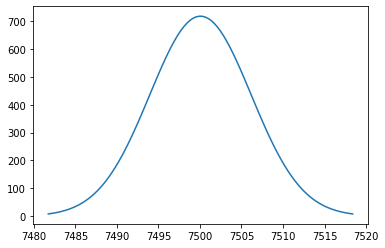

In [814]:
x = np.linspace(np.mean(residuals) - 3 * np.std(residuals), np.mean(residuals) + 3 * np.std(residuals), 100)
print(x)
plt.plot(x, scistats.norm.pdf(x, np.mean(residuals), np.std(residuals)) * 11000)
plt.show()

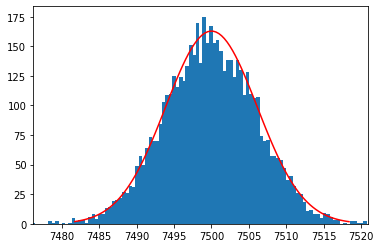

In [821]:
hist, bin_edges = np.histogram(residuals, bins = 100)
plt.bar(bin_edges[:-1], hist, width = 0.5)
plt.plot(x, scistats.norm.pdf(x, sigma ** 2 * T * n, np.sqrt(T * sigma ** 4 * 2 * n)) * 2500, color = 'red')
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()   

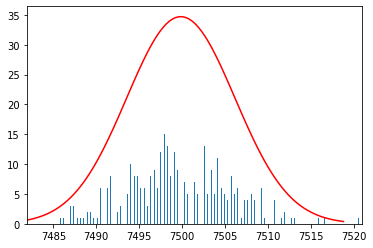

In [805]:
hist, bin_edges = np.histogram(residuals, bins = 100)

plt.bar(bin_edges[:-1], hist, width = 0.1)
plt.plot(x, scistats.norm.pdf(x, np.mean(residuals), np.std(residuals)) * 550, color = 'red')
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()   

In [122]:
W = m._OMP_2(X[:-1], X[1:], tol = 0.16, verbose = True)
print(W)

Q
[13.94370598730125, 10.212826403440868, 10.748839818488676]
MaxGain: 8.34.
Gain: [6.92 2.47 8.34 1.61 3.34 0.12 0.67 1.24 4.43].
W:
[[0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.78 0.   0.  ]].

F: [[False False False]
 [False False False]
 [ True False False]].
Q
[11.172688981519213, 10.212826403440868, 10.748839818488676]
MaxGain: 4.76.
Gain: [4.76 2.12 0.   1.61 3.34 0.12 0.67 1.24 4.43].
W:
[[0.38 0.   0.  ]
 [0.   0.   0.  ]
 [0.66 0.   0.  ]].

F: [[ True False False]
 [False False False]
 [ True False False]].
Q
[10.026610923365679, 10.212826403440868, 10.748839818488676]
MaxGain: 4.43.
Gain: [0.   2.43 0.   1.61 3.34 0.12 0.67 1.24 4.43].
W:
[[0.38 0.   0.  ]
 [0.   0.   0.  ]
 [0.66 0.   0.41]].

F: [[ True False False]
 [False False False]
 [ True False  True]].
Q
[10.026610923365679, 10.212826403440868, 9.792453419861316]
MaxGain: 3.34.
Gain: [0.   2.43 0.   1.61 3.34 0.12 0.48 1.05 0.  ].
W:
[[0.38 0.   0.  ]
 [0.   0.33 0.  ]
 [0.66 0.   0.41]].

F: [[ True False False]
 [Fals

In [116]:
print(np.round([X[:, i].dot(X[:, j]) for i in range(n) for j in range(i) if i != j], 2))

[ 3.12 -3.74  4.92]
